#1.Install and import paddle

In [ ]:
!python3 -m pip install paddlepaddle==2.0.1 -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 208.1 MB 45 kB/s 


In [ ]:
# Install paddle OCR
!pip install "paddleocr>=2.0.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Clone repo Paddle OCR
!git clone https://github.com/PaddlePaddle/PaddleOCR

fatal: destination path 'PaddleOCR' already exists and is not an empty directory.


In [ ]:
from paddleocr import PaddleOCR, draw_ocr
from matplotlib import pyplot as plt
import cv2
import os

/usr/local/lib/python3.7/dist-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To si

#2. Instantiate Model And Detect

In [ ]:
#Setup language
ocr = PaddleOCR(lang = 'en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3.86M/3.86M [00:26<00:00, 146kiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:22<00:00, 443kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 1.45M/1.45M [00:11<00:00, 125kiB/s]

[2022/06/03 03:28:54] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='f

In [12]:
# Path to receipt image
testImg_path = os.path.join('.','testImage.jpg')

In [14]:
testImg_path

'./testImage.jpg'

'./testImage.jpg'

In [15]:
# Run ocr method on ocr model
result = ocr.ocr(testImg_path)

[2022/06/03 03:44:07] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/06/03 03:44:08] ppocr DEBUG: dt_boxes num : 43, elapse : 0.9764926433563232
[2022/06/03 03:44:15] ppocr DEBUG: rec_res num  : 43, elapse : 7.58297324180603


In [23]:
# First element: 4 coordinates of 4 vertices of bounding box
# Second element: text and probability of text
result

[[[[963.0, 432.0], [1433.0, 432.0], [1433.0, 513.0], [963.0, 513.0]],
  ('Berghotel', 0.955888032913208)],
 [[[798.0, 509.0], [1642.0, 531.0], [1639.0, 633.0], [795.0, 611.0]],
  ('Grosse Scheidegg', 0.993383526802063)],
 [[[905.0, 618.0], [1478.0, 626.0], [1477.0, 697.0], [904.0, 690.0]],
  ('3818 Grindelwald', 0.9659821391105652)],
 [[[908.0, 721.0], [1471.0, 721.0], [1471.0, 792.0], [908.0, 792.0]],
  ('Familie R.Muller', 0.9929790496826172)],
 [[[372.0, 918.0], [838.0, 918.0], [838.0, 989.0], [372.0, 989.0]],
  ('Rech.Nr. 4572', 0.9928866028785706)],
 [[[1224.0, 918.0], [1892.0, 922.0], [1891.0, 993.0], [1224.0, 989.0]],
  ('30.07.2007/1329:17', 0.9703177213668823)],
 [[[366.0, 1004.0], [491.0, 1019.0], [480.0, 1101.0], [355.0, 1086.0]],
  ('Bar', 0.9981616139411926)],
 [[[1470.0, 1012.0], [1670.0, 1021.0], [1667.0, 1099.0], [1466.0, 1090.0]],
  ('Tisch', 0.9970232248306274)],
 [[[1742.0, 1020.0], [1899.0, 1020.0], [1899.0, 1095.0], [1742.0, 1095.0]],
  ('7/01', 0.9972859621047974)

In [24]:
# Coordinates of bounding box
result[0][0]    # First line

[[963.0, 432.0], [1433.0, 432.0], [1433.0, 513.0], [963.0, 513.0]]

In [25]:
# Text
result[0][1][0]   # First line

'Berghotel'

In [26]:
# All text in receipt
for data in result:
  print(data[1][0])

Berghotel
Grosse Scheidegg
3818 Grindelwald
Familie R.Muller
Rech.Nr. 4572
30.07.2007/1329:17
Bar
Tisch
7/01
4.50
2xLatte Macchiato
CHF
a
9.00
5.00
1xG 1oki
CHF
5.00
22.00
CHF
a
22.00
1xSchweinschnitzel
18.50
CHF
1xChasspatzli
18.50
a
54.50
Total :
CHF
3.85
Incl. 7.6% MwSt
54.50 CHF:
Entspricht in Euro
36.33 EUR
Es bediente Sie: Ursula
MwSt Nr.: 430 234
Tel.: 033 853 67 16
Fax.: 033 853 67 19
E-mail: grossescheidegg@bluewin.ch


#3. Visualize Results

In [31]:
# Components
boxes = [data[0] for data in result]
texts = [data[1][0] for data in result]
probs = [data[1][1] for data in result]

In [36]:
# Font path for draw_ocr method
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

In [37]:
# Import test image
testImg = cv2.imread(testImg_path)
testImg = cv2.cvtColor(testImg, cv2.COLOR_BGR2RGB)

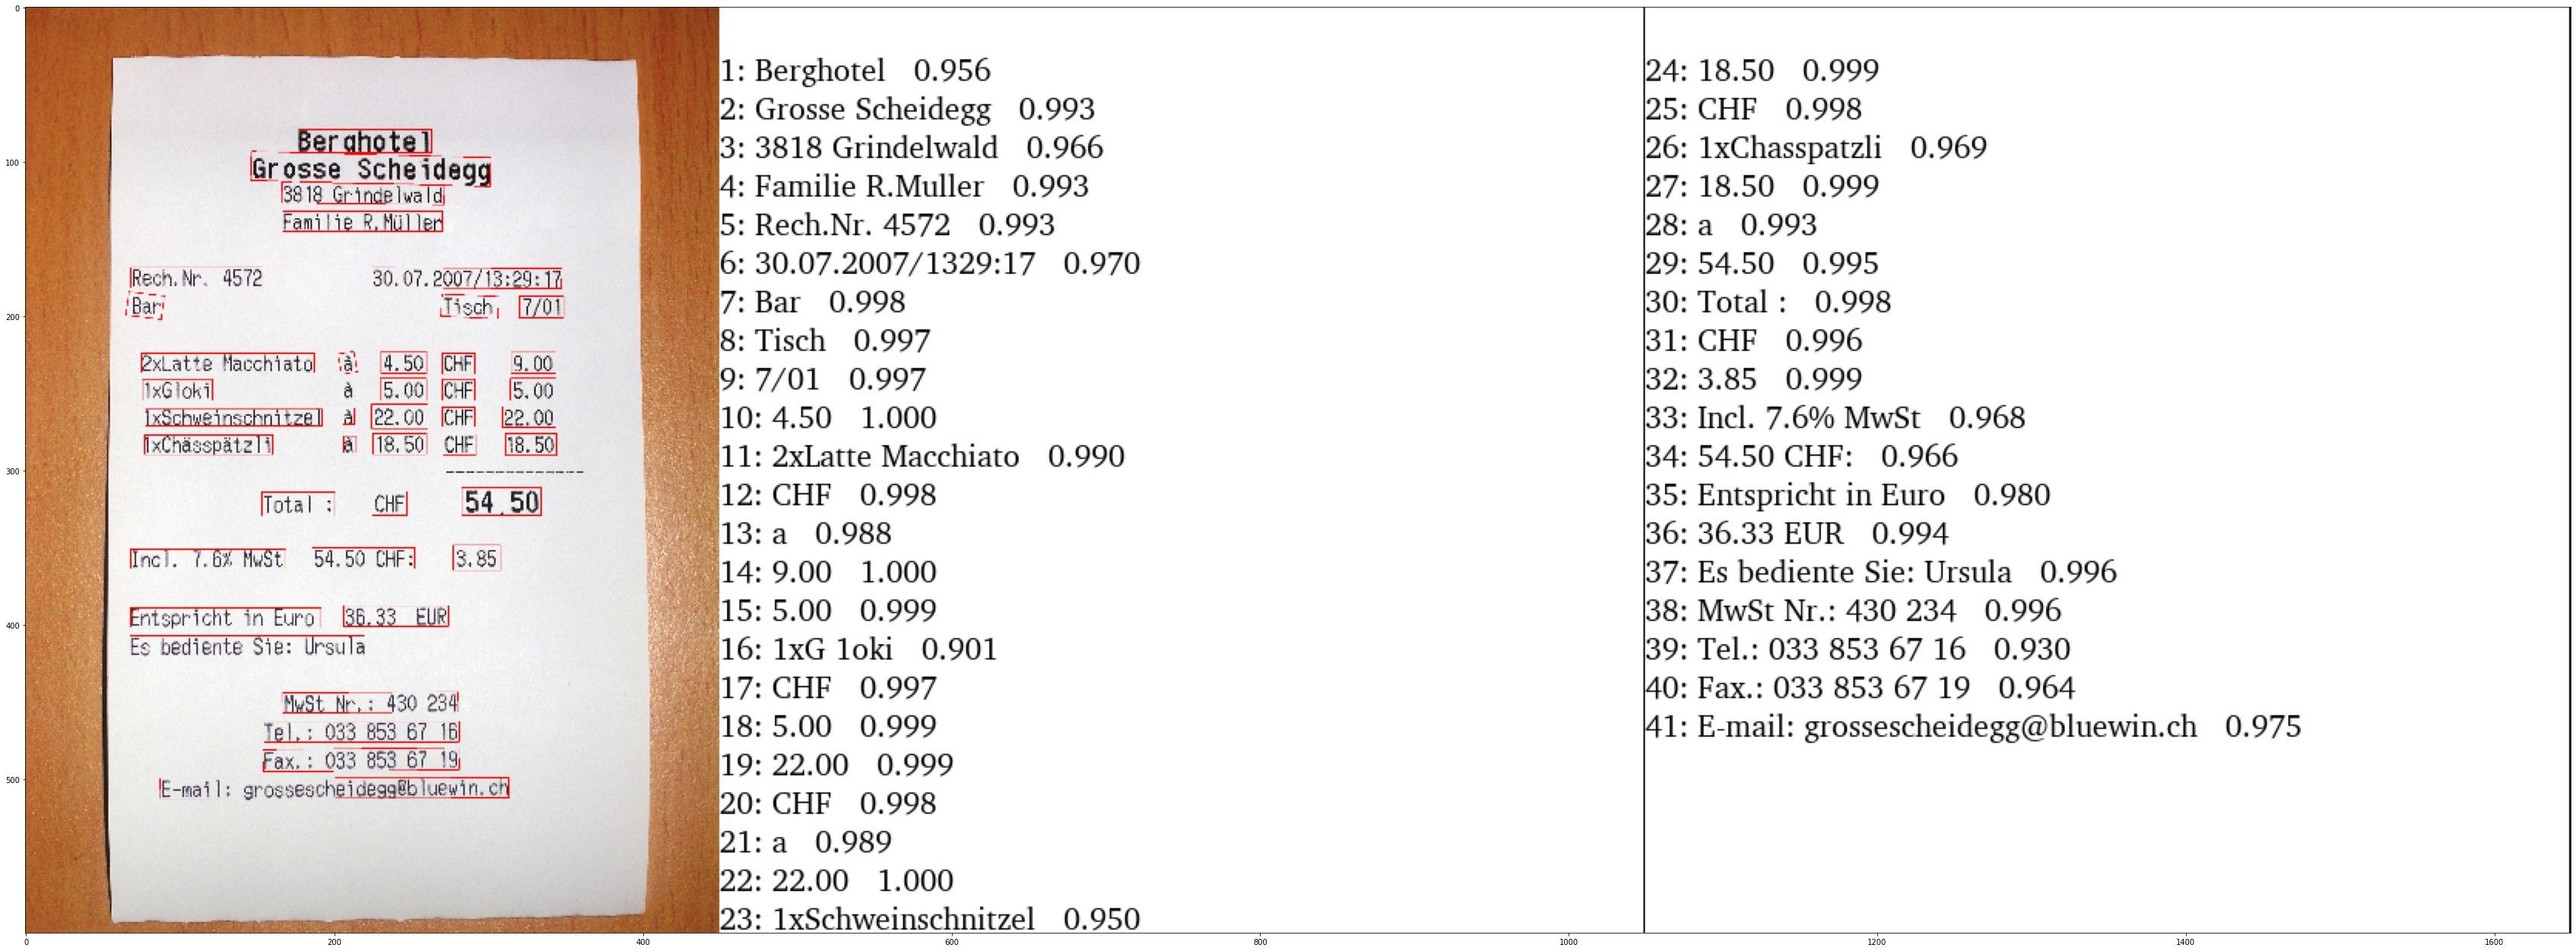

In [42]:
# Visualize image (draw bounding boxes) and components by using matplotlib
plt.figure(figsize = (60, 40))
annonate = draw_ocr(testImg, boxes, texts, probs, font_path = font_path)
plt.imshow(annonate)